In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings to improve readability
warnings.filterwarnings('ignore')


In [2]:
# Importing the data
df = pd.read_csv('../data/raw/telecom_cleaned_data.csv', sep=',')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# One Hot Encoding

In [4]:
# Separate customerID from other columns and convert the 'Churn' column to a binary format
customer_id = df['customerID']
df.drop('customerID', axis=1, inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [5]:
# Select categorical columns to be one-hot encoded
categorical_cols = df.select_dtypes(include=['object']).columns

In [6]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,False,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [7]:
# Perform one-hot encoding using pd.get_dummies()
# The 'drop_first=True' argument is used to avoid multicollinearity.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [8]:
df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,False,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,False,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,False,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,False,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,False,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,False,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,True,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [9]:
# Add the customerID column back for identification
df_encoded['customerID'] = customer_id

In [10]:
#Display the first few rows of the transformed DataFrame
print("First 5 rows of the one-hot encoded DataFrame:")
df_encoded.head()

First 5 rows of the one-hot encoded DataFrame:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
0,False,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,7590-VHVEG
1,False,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,5575-GNVDE
2,False,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,3668-QPYBK
3,False,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,7795-CFOCW
4,False,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,9237-HQITU


In [11]:
df_encoded.shape

(7043, 32)

# Handling class imbalance

### **SMOTE** - Synthetic Minority Oversampling Technique

In [12]:
# Drop customerID since it is not a feature for the model
df_encoded.drop('customerID', axis=1, inplace=True)

In [13]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# Display the class distribution before resampling
print("Class distribution in training data before SMOTE:")
print(y_train.value_counts())

Class distribution in training data before SMOTE:
Churn
0    4139
1    1495
Name: count, dtype: int64


In [21]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [22]:
# Display the class distribution after resampling
print("\nClass distribution in training data after SMOTE:")
print(y_train_resampled.value_counts())



Class distribution in training data after SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64


# Base Line Model Implementation for Logistic Regression

In [28]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
y_train_pred = model.predict(X_train)

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [32]:
#getting all scores
def evaluation_metrics(y_train_pred,y_train,y_pred,y_test):
  
  train_accuracy = round(accuracy_score(y_train_pred,y_train), 3)
  accuracy = round(accuracy_score(y_pred,y_test), 3)
  precision = round(precision_score(y_pred,y_test), 3)
  recall = round(recall_score(y_pred,y_test), 3)
  f1 = round(f1_score(y_pred,y_test), 3)
  roc = round(roc_auc_score(y_pred,y_test), 3)

  print("The accuracy on train data is ", train_accuracy)
  print("The accuracy on test data is ", accuracy)
  print("The precision on test data is ", precision)
  print("The recall on test data is ", recall)
  print("The f1 on test data is ", f1)
  print("The roc_score on test data is ", roc)

In [43]:
# Get the confusion matrix
def cf_matrix(y_test,y_pred):

# Generate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Visualize the confusion matrix using a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
  plt.title('Confusion Matrix for Logistic Regression Model')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

In [41]:
evaluation_metrics(y_train_pred,y_train,y_pred,y_test)

The accuracy on train data is  0.762
The accuracy on test data is  0.739
The precision on test data is  0.647
The recall on test data is  0.506
The f1 on test data is  0.568
The roc_score on test data is  0.682


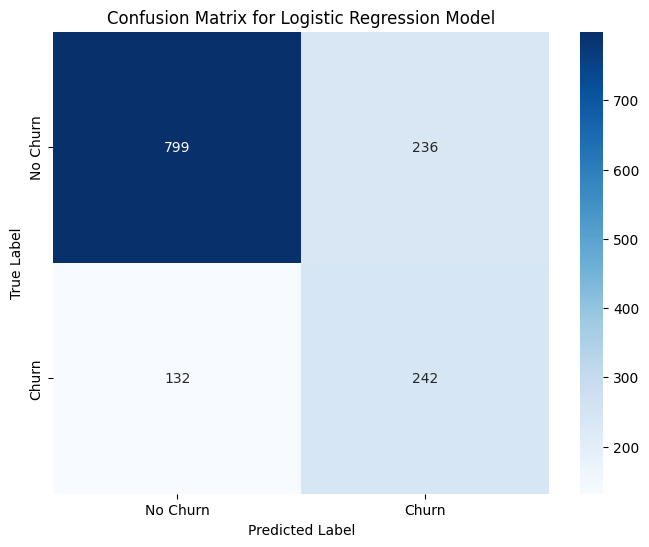

In [44]:
cf_matrix(y_test,y_pred)